# 1. Aprofundando o Keras 1

## a. Conhecendo base de dados

In [ ]:
#Importar bibliotecas
import tensorflow
from tensorflow  import keras
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

#Criar base de dados
dataset=keras.datasets.fashion_mnist
((imagens_treino,rotulos_treino),(imagens_teste,rotulos_teste))=dataset.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
#Tamanho do dataset
print('Imagens de treino:',len(imagens_treino),'|Com dimensão de:',imagens_treino.shape)
print('Imagens de teste :',len(imagens_teste),'|Com dimensão de:',imagens_treino.shape)

Imagens de treino: 60000 |Com dimensão de: (60000, 28, 28)
Imagens de teste : 10000 |Com dimensão de: (60000, 28, 28)


Text(0.5, 1.0, '9')

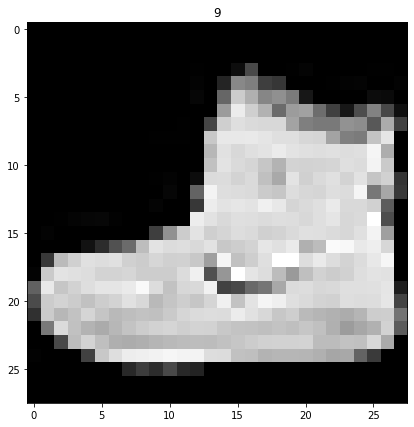

In [ ]:
#Visulizar imagem
plt.rcParams['figure.figsize'] = (11,7)

plt.imshow(imagens_treino[0],cmap='gray')
plt.title(rotulos_treino[0])

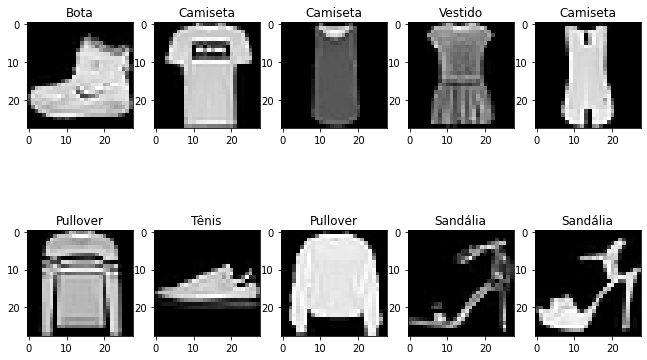

In [ ]:
#Associar código ao objeto
nomes_rotulos=['Camiseta','Calça','Pullover','Vestido','Casaco','Sandália','Camisa','Tênis','Bolsa','Bota']
for imagem in range (len(nomes_rotulos)):
  plt.subplot(2,5,imagem+1)
  plt.imshow(imagens_treino[imagem],cmap='gray')
  plt.title(nomes_rotulos[rotulos_treino[imagem]])

## b. Melhor modelo

In [ ]:
#Tamanho das imagens
tamanho_imagem=(28,28)
#Função de ativação
funcao_ativacao=tensorflow.nn.relu
#N° de saídas
saidas=10
#Função de probabilidade de saída 
funcao_prob= tensorflow.nn.softmax

modelo=keras.Sequential([
                         keras.layers.Flatten(input_shape=tamanho_imagem),      #Entrada (Camada 0)  
                         keras.layers.Dense(256,activation=funcao_ativacao),    #Processamento (Camada 1)
                         keras.layers.Dropout(0.2),                             #Processamento (Camada 2)
                         keras.layers.Dense(saidas,activation=funcao_prob)])    #Saída (Camada 3) 
#Treinar modelo
modelo.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
historico=modelo.fit(imagens_treino,rotulos_treino,epochs=5,validation_split=0.2)

In [ ]:
# Sumário do modeo
sumario=modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


# 2.Manipulando parâmetros do modelo

## a. Pesos

In [ ]:
# Pesos da camada densa
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense.shape

(784, 256)

In [ ]:
# Pesos da camada densa
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

In [ ]:
# Alterando os pesos para 0
pesos_camada_dense_zerados = np.zeros((784, 256))
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense])


In [ ]:
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico=modelo.fit(imagens_treino,rotulos_treino,epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 1.2046 - accuracy: 0.5290 - val_loss: 0.8828 - val_accuracy: 0.6668
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 1.0565 - accuracy: 0.5837 - val_loss: 0.8836 - val_accuracy: 0.6314
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 1.0330 - accuracy: 0.5951 - val_loss: 0.8376 - val_accuracy: 0.6587
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 1.0013 - accuracy: 0.6165 - val_loss: 0.7150 - val_accuracy: 0.7266
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.9844 - accuracy: 0.6199 - val_loss: 0.7047 - val_accuracy: 0.7290


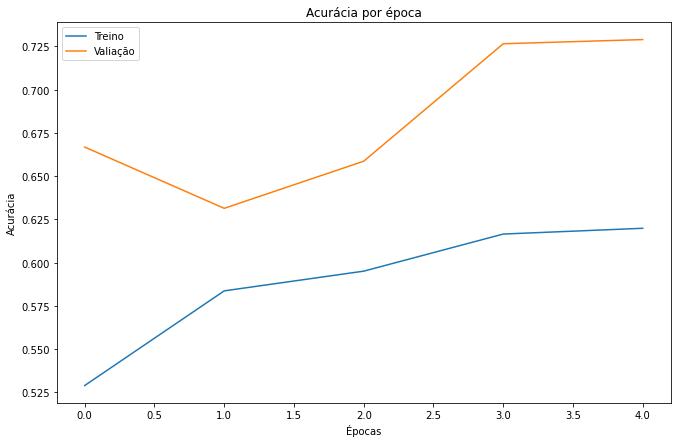

In [ ]:
# Acuracia dos pesos 0
plt.rcParams['figure.figsize'] = (11,7)

plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino','Valiação'])

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 11225.8984 - accuracy: 0.4079 - val_loss: 1652.2194 - val_accuracy: 0.7373
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2466.7458 - accuracy: 0.6050 - val_loss: 1338.3475 - val_accuracy: 0.6739
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 1149.6832 - accuracy: 0.6431 - val_loss: 536.8107 - val_accuracy: 0.7168
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 583.7342 - accuracy: 0.6777 - val_loss: 301.5487 - val_accuracy: 0.7301
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 298.1825 - accuracy: 0.7212 - val_loss: 182.1709 - val_accuracy: 0.7203


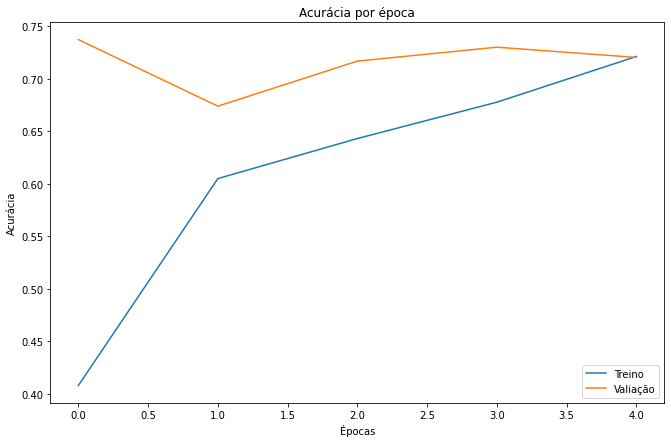

In [ ]:
#  Pesos aletórios
pesos_camada_dense.shape
pesos_camada_dense_aleatorios = np.random.rand(784, 256)

modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense]
)
# Modelo
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico=modelo.fit(imagens_treino,rotulos_treino,epochs=5,validation_split=0.2)

#Acurácia 

plt.rcParams['figure.figsize'] = (11,7)

plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino','Valiação'])

## b.Vieses

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.7126 - accuracy: 0.1011 - val_loss: 2.5110 - val_accuracy: 0.0957
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.4200 - accuracy: 0.1011 - val_loss: 2.3564 - val_accuracy: 0.0957
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3242 - accuracy: 0.1011 - val_loss: 2.3069 - val_accuracy: 0.0957
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3037 - accuracy: 0.0997 - val_loss: 2.3028 - val_accuracy: 0.0983
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3028 - val_accuracy: 0.0983


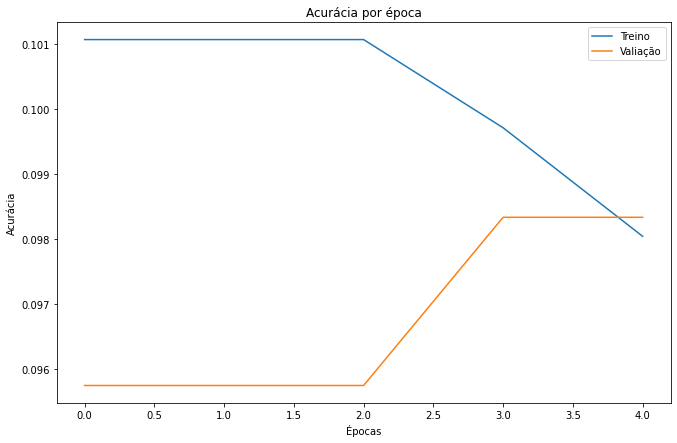

In [ ]:
# Alterando os vieses para 0
vieses_camada_dense_zerados = np.zeros((256))
modelo.layers[1].set_weights(
    [pesos_camada_dense, vieses_camada_dense_zerados])

#Modelo 
# Modelo
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico=modelo.fit(imagens_treino,rotulos_treino,epochs=5,validation_split=0.2)

#Acurácia 
plt.rcParams['figure.figsize'] = (11,7)
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino','Valiação'])

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3027 - accuracy: 0.1005 - val_loss: 2.3028 - val_accuracy: 0.1003
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.0983
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1003
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.1002 - val_loss: 2.3026 - val_accuracy: 0.0983
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.0977 - val_loss: 2.3027 - val_accuracy: 0.0995


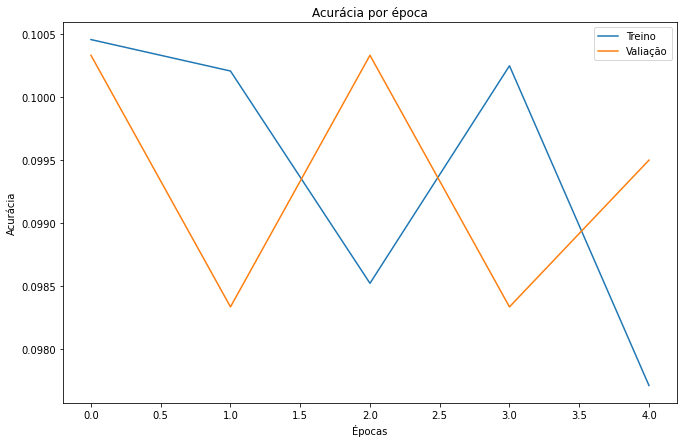

In [ ]:
# Alterando os vieses e pesos para 0 
vieses_camada_dense_zerados = np.zeros((256))
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense_zerados])

#Modelo 
# Modelo
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico=modelo.fit(imagens_treino,rotulos_treino,epochs=5,validation_split=0.2)

#Acurácia 
plt.rcParams['figure.figsize'] = (11,7)
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino','Valiação'])

# 3.Hiperparâmetros

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3615 - accuracy: 0.1009 - val_loss: 2.3988 - val_accuracy: 0.1003
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3614 - accuracy: 0.0990 - val_loss: 2.3217 - val_accuracy: 0.1003
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3634 - accuracy: 0.0995 - val_loss: 2.3624 - val_accuracy: 0.1027
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3607 - accuracy: 0.1003 - val_loss: 2.3338 - val_accuracy: 0.0957
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3626 - accuracy: 0.0994 - val_loss: 2.3702 - val_accuracy: 0.1013


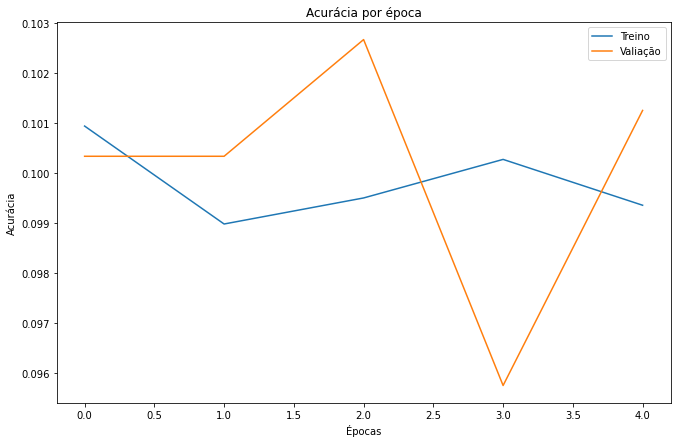

In [ ]:
# Alterando otimizador
adam=keras.optimizers.Adam(lr=0.5)
# Modelo
modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico=modelo.fit(imagens_treino,rotulos_treino,epochs=5,validation_split=0.2)

#Acurácia 
plt.rcParams['figure.figsize'] = (11,7)
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino','Valiação'])

In [ ]:
# Modelo
adam=keras.optimizers.Adam(lr=0.002)
modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico=modelo.fit(imagens_treino,rotulos_treino,epochs=5,validation_split=0.2)

# Reduzindo o tanho de "pacote" de dados processados 

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico=modelo.fit(imagens_treino,rotulos_treino,epochs=5,
                     batch_size=150,
                     validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3035 - accuracy: 0.1003 - val_loss: 2.3030 - val_accuracy: 0.0957
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3029 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.0983
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3029 - accuracy: 0.1003 - val_loss: 2.3028 - val_accuracy: 0.0983
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.1016 - val_loss: 2.3030 - val_accuracy: 0.1003
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3029 - accuracy: 0.0997 - val_loss: 2.3029 - val_accuracy: 0.0983
Epoch 1/5
320/320 [==============================] - 2s 6ms/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3027 - val_accuracy: 0.0983
Epoch 2/5
320/320 [==============================] - 2s 6ms/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3027 - val_accuracy: 0.0983
Epo

Callbacks

In [ ]:
# Parada entecipada

# Modelo
adam=keras.optimizers.Adam(lr=0.002)
modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico=modelo.fit(imagens_treino,rotulos_treino,epochs=5,validation_split=0.2)

# Paraada antecipada 
callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss')]

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico=modelo.fit(imagens_treino,rotulos_treino,epochs=5,
                     batch_size=150,
                     validation_split=0.2,callbacks=callbacks)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3029 - accuracy: 0.0983 - val_loss: 2.3034 - val_accuracy: 0.0957
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3029 - accuracy: 0.0988 - val_loss: 2.3028 - val_accuracy: 0.0983
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3029 - accuracy: 0.0992 - val_loss: 2.3030 - val_accuracy: 0.1027
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3029 - accuracy: 0.0983 - val_loss: 2.3029 - val_accuracy: 0.1003
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3029 - accuracy: 0.0985 - val_loss: 2.3032 - val_accuracy: 0.0983
Epoch 1/5
320/320 [==============================] - 2s 7ms/step - loss: 2.3028 - accuracy: 0.0982 - val_loss: 2.3028 - val_accuracy: 0.0983
Epoch 2/5
320/320 [==============================] - 2s 5ms/step - loss: 2.3027 - accuracy: 0.0994 - val_loss: 2.3027 - val_accuracy: 0.1005
Epo

In [ ]:
# Checkpoints

# Modelo
adam=keras.optimizers.Adam(lr=0.002)
modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico=modelo.fit(imagens_treino,rotulos_treino,epochs=5,validation_split=0.2)

# Paraada antecipada 
callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss'), 
           keras.callbacks.ModelCheckpoint(filepath='pontos_controle.hdf5', monitor='val_loss',save_best_only=True)]

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico=modelo.fit(imagens_treino,rotulos_treino,epochs=5,
                     batch_size=150,
                     validation_split=0.2,callbacks=callbacks)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3030 - accuracy: 0.0976 - val_loss: 2.3027 - val_accuracy: 0.1030
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3029 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.1005
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3029 - accuracy: 0.0996 - val_loss: 2.3031 - val_accuracy: 0.0957
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3029 - accuracy: 0.0990 - val_loss: 2.3031 - val_accuracy: 0.0995
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3029 - accuracy: 0.0993 - val_loss: 2.3029 - val_accuracy: 0.1003
Epoch 1/5
320/320 [==============================] - 2s 6ms/step - loss: 2.3027 - accuracy: 0.0995 - val_loss: 2.3028 - val_accuracy: 0.0957
Epoch 2/5
320/320 [==============================] - 2s 6ms/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3028 - val_accuracy: 0.0957
